# Setup

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/

/content/drive/MyDrive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [4]:
df_naive = pd.read_csv("naive_op.csv")

In [5]:
df_lca = pd.read_csv("lca_op.csv")

In [8]:
df_naive.reset_index(inplace=True)
df_lca.reset_index(inplace=True)

In [16]:
df_lca

,index,Unnamed: 0,ST_construction_time,LCA_Preprocess,alphabet_size,queries,size,exec_time
0,0,-1,40,75,26,10,10,16
1,1,0,42,90,5,10,10,16
2,2,1,106,248,4,10,10,59
3,3,2,44,98,2,10,10,26
4,4,3,42,91,17,10,10,25
5,5,4,75,92,10,10,10,26
6,6,5,41,92,11,10,10,22
7,7,6,234,797,26,100,100,262
8,8,7,223,1056,2,100,100,300
9,9,8,233,824,5,100,100,327


# Avg Query Time vs N/Alpha

In [19]:
cum_rt_n = df_naive.groupby(['size']).agg({'exec_time':'mean'}).sort_values(by='size')
cum_rt_n

,exec_time
size,
10,4.428571
100,2.714286
1000,17.142857
10000,294.000000
100000,14144.000000
1000000,102833.428571
10000000,120125.142857


In [11]:
cum_rt_l = df_lca.groupby(['size']).agg({'exec_time':'mean'}).sort_values(by='size')
cum_rt_l

,exec_time
size,
10,2.714286e+01
100,2.768571e+02
1000,3.618000e+03
10000,4.797214e+04
100000,6.547003e+05
1000000,4.541147e+06
10000000,2.214128e+07


In [156]:
cum_rt_l.index[-3:]

Int64Index([100000, 1000000, 10000000], dtype='int64', name='size')

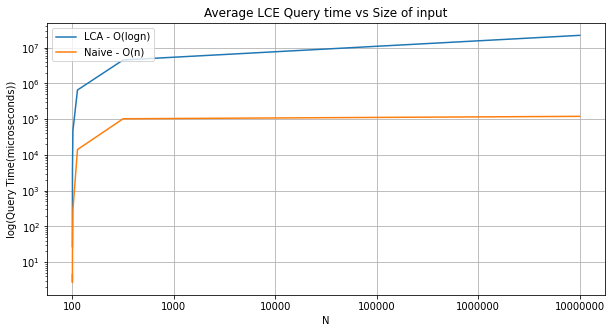

In [181]:
plt.figure('query_time', figsize=(10,5))
ax = plt.gca()
pattern_size = ['10', '100', '1000', '10000', '100000', '1000000', '10000000']
ax.set_xticklabels(pattern_size)
plt.yscale('log')
plt.plot(cum_rt_l.index, cum_rt_l.exec_time, label='LCA - O(logn)')
plt.plot(cum_rt_n.index, cum_rt_n.exec_time, label='Naive - O(n)')

plt.xlabel('N')
plt.ylabel('log(Query Time(microseconds))')
plt.title("Average LCE Query time vs Size of input")
plt.grid(True)
plt.legend(loc="upper left")
plt.show()

In [52]:
cum_al = df_lca.groupby(['alphabet_size']).agg({'exec_time':'mean'}).sort_values(by='alphabet_size')
cum_al

,exec_time
alphabet_size,
2,6.540667e+06
4,3.768726e+06
5,3.348959e+06
10,3.462005e+06
11,3.645136e+06
17,3.364864e+06
26,3.258661e+06


In [53]:
cum_al2 = df_naive.groupby(['alphabet_size']).agg({'exec_time':'mean'}).sort_values(by='alphabet_size')
cum_al2

,exec_time
alphabet_size,
2,30292.857143
4,34267.571429
5,34192.428571
10,34728.000000
11,34453.571429
17,35647.571429
26,33838.857143


In [54]:
cum_al['Type'] = [''.join("LCA") for i in range(len(cum_al.index))]
cum_al2['Type'] = [''.join("Naive") for i in range(len(cum_al2.index))]

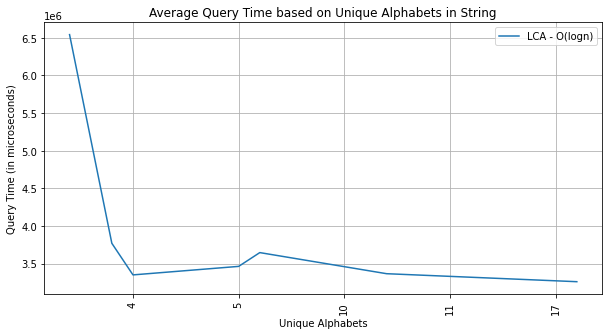

In [191]:
plt.figure('query_alpha', figsize=(10, 5))
ax = plt.gca()
pattern_size = ['2', '4', '5', '10', '11', '17', '26']
ax.set_xticklabels(pattern_size)
# ax.set_yscale('log', basey=2)
plt.plot(cum_al.index, cum_al.exec_time, label='LCA - O(logn)')
plt.xticks(rotation = 90)
plt.xlabel('Unique Alphabets')
plt.ylabel('Query Time (in microseconds)')
plt.title("Average Query Time based on Unique Alphabets in String")
plt.legend(loc = "upper right")
plt.grid()
plt.show()

TODO - Add permuted test

# Preprocessing Time and Suffix Tree Time



In [130]:
cum_pr = df_lca.groupby(['alphabet_size']).agg({'LCA_Preprocess':'mean', 'ST_construction_time': 'mean'}).sort_values(by='alphabet_size')
cum_pr

,LCA_Preprocess,ST_construction_time
alphabet_size,,
2,3.159709e+07,5.464694e+06
4,2.679305e+07,6.195750e+06
5,2.612555e+07,6.405030e+06
10,2.300883e+07,6.229549e+06
11,2.446639e+07,6.757679e+06
17,2.304975e+07,6.905271e+06
26,2.163884e+07,6.258338e+06


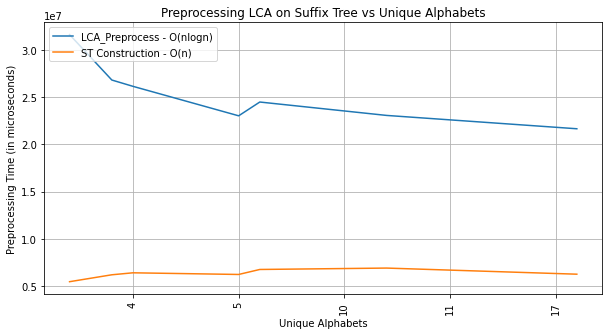

In [184]:
plt.figure('preprocess', figsize=(10,5))
ax = plt.gca()
pattern_size = ['2', '4', '5', '10', '11', '17', '26']
ax.set_xticklabels(pattern_size)
plt.plot(cum_pr.index, cum_pr.LCA_Preprocess, label = "LCA_Preprocess - O(nlogn)")
plt.plot(cum_pr.index, cum_pr.ST_construction_time, label = "ST Construction - O(n)")
plt.xticks(rotation = 90)
plt.xlabel('Unique Alphabets')
plt.ylabel('Preprocessing Time (in microseconds)')
plt.title("Preprocessing LCA on Suffix Tree vs Unique Alphabets")
plt.grid(True)
plt.legend(loc="upper left")
plt.show()

TODO - Add permuted test

In [62]:
cum_pr = df_lca.groupby(['size']).agg({'LCA_Preprocess':'mean', 'ST_construction_time': 'mean'}).sort_values(by='size')
cum_pr

,LCA_Preprocess,ST_construction_time
size,,
10,1.122857e+02,5.571429e+01
100,8.140000e+02,2.220000e+02
1000,9.594714e+03,2.058143e+03
10000,1.011110e+05,2.299714e+04
100000,1.198310e+06,2.796220e+05
1000000,1.379511e+07,3.512281e+06
10000000,1.615745e+08,4.039907e+07


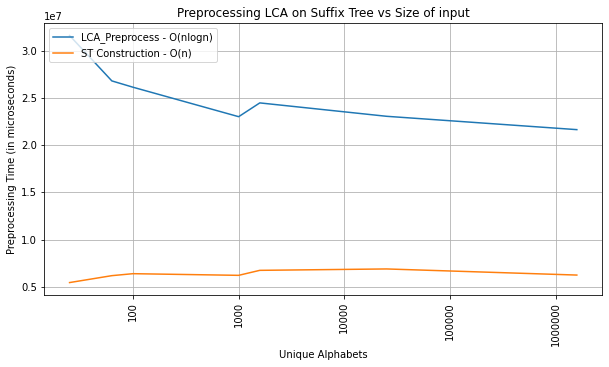

In [185]:
plt.figure('preprocess', figsize=(10,5))
ax = plt.gca()
pattern_size = ['10', '100', '1000', '10000', '100000', '1000000', '10000000']
ax.set_xticklabels(pattern_size)

plt.plot(cum_pr.index, cum_pr.LCA_Preprocess, label = "LCA_Preprocess - O(nlogn)")
plt.plot(cum_pr.index, cum_pr.ST_construction_time, label = "ST Construction - O(n)")
plt.xticks(rotation = 90)
plt.xlabel('Unique Alphabets')
plt.ylabel('Preprocessing Time (in microseconds)')
plt.title("Preprocessing LCA on Suffix Tree vs Size of input")
plt.grid(True)
plt.legend(loc="upper left")
plt.show()

# Per Query Time for LCA vs Naive




In [132]:
df_n = df_naive.groupby(["size", "queries"]).agg({"exec_time":"sum"})
df_l = df_lca.groupby(["size", "queries"]).agg({"exec_time":"sum"})

In [133]:
t = df_n["exec_time"]/df_n.index.get_level_values(1)
t2 = df_l["exec_time"]/df_l.index.get_level_values(1)

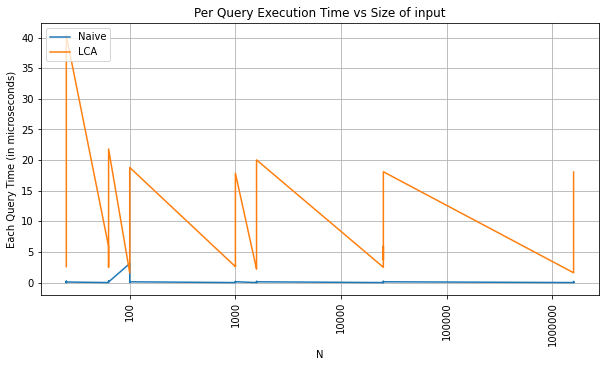

In [173]:
plt.figure('query', figsize=(10,5))
ax = plt.gca()
pattern_size = ['10', '100', '1000', '10000', '100000', '1000000', '10000000']
ax.set_xticklabels(pattern_size)

plt.plot(df_n.index.get_level_values(0), t, label = "Naive")
plt.plot(df_l.index.get_level_values(0), t2, label = "LCA")
plt.xticks(rotation = 90)
plt.xlabel('N')
plt.ylabel('Each Query Time (in microseconds)')
plt.title("Per Query Execution Time vs Size of input")
plt.grid(True)
plt.legend(loc="upper left")
plt.show()

In [174]:
df_n = df_naive.groupby(["alphabet_size", "queries"]).agg({"exec_time":"sum"})
df_l = df_lca.groupby(["alphabet_size", "queries"]).agg({"exec_time":"sum"})

In [175]:
t = df_n["exec_time"]/df_n.index.get_level_values(1)
t2 = df_l["exec_time"]/df_l.index.get_level_values(1)

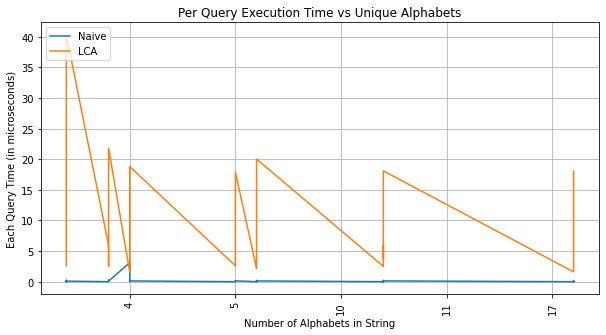

In [176]:
plt.figure('query', figsize=(10,5))
ax = plt.gca()
pattern_size = ['2', '4', '5', '10', '11', '17', '26']
ax.set_xticklabels(pattern_size)

plt.plot(df_n.index.get_level_values(0), t, label = "Naive")
plt.plot(df_l.index.get_level_values(0), t2, label = "LCA")
plt.xticks(rotation = 90)
plt.xlabel('Number of Alphabets in String')
plt.ylabel('Each Query Time (in microseconds)')
plt.title("Per Query Execution Time vs Unique Alphabets")
plt.grid(True)
plt.legend(loc="upper left")
plt.show()

# Memory Used

In [138]:
df_nmem = pd.read_csv("naive_op_mem.csv")
df_lmem = pd.read_csv("lca_op_mem.csv")

In [139]:
df_nmem.drop(df_nmem.tail(1).index, inplace=True) # drop last n rows

In [140]:
df_nmem.columns

Index(['Unnamed: 0', 'alphabet_size', 'size', 'memory_dump'], dtype='object')

In [141]:
cum_n = df_nmem.groupby(['size']).agg({'memory_dump':'mean'}).sort_values(by='size')
cum_n

,memory_dump
size,
10,195639.571429
100,195742.571429
1000,196644.571429
10000,220220.571429
100000,449573.571429
1000000,284362.571429


In [142]:
cum_l = df_lmem.groupby(['size']).agg({'memory_dump':'mean'}).sort_values(by='size')
cum_l

,memory_dump
size,
10,177686.428571
100,281141.142857
1000,57103.714286
10000,378545.428571
100000,489292.714286
1000000,513881.142857


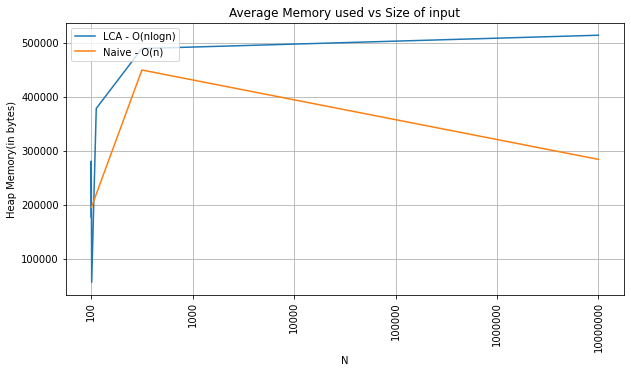

In [143]:
plt.figure('memory', figsize=(10,5))
ax = plt.gca()
pattern_size = ['10', '100', '1000', '10000', '100000', '1000000', '10000000']
ax.set_xticklabels(pattern_size)
plt.plot(cum_l.index, cum_l.memory_dump, label='LCA - O(nlogn)')
plt.plot(cum_n.index, cum_n.memory_dump, label='Naive - O(n)')
plt.xticks(rotation = 90)
plt.xlabel('N')
plt.ylabel('Heap Memory(in bytes)')
plt.title("Average Memory used vs Size of input")
plt.grid(True)
plt.legend(loc="upper left")
plt.show()

In [144]:
cum_n = df_nmem.groupby(['alphabet_size']).agg({'memory_dump':'mean'}).sort_values(by='alphabet_size')
cum_n

,memory_dump
alphabet_size,
2,257030.0
4,257030.0
5,257030.0
10,257031.0
11,257031.0
17,257031.0
26,257031.0


In [145]:
cum_l = df_lmem.groupby(['alphabet_size']).agg({'memory_dump':'mean'}).sort_values(by='alphabet_size')
cum_l

,memory_dump
alphabet_size,
2,391994.333333
4,175537.666667
5,514064.333333
10,336207.333333
11,139606.000000
17,193428.666667
26,463087.333333


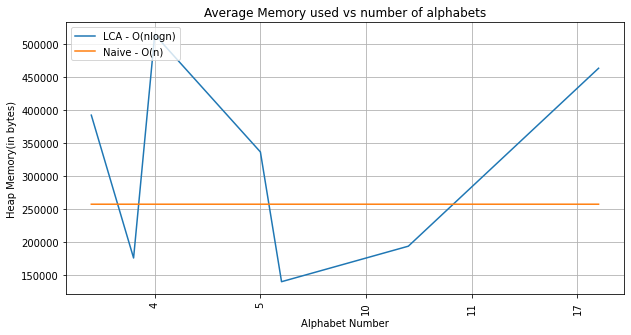

In [178]:
plt.figure('memory', figsize=(10,5))
ax = plt.gca()
pattern_size = ['2', '4', '5', '10', '11', '17', '26']
ax.set_xticklabels(pattern_size)

plt.plot(cum_l.index, cum_l.memory_dump, label='LCA - O(nlogn)')
plt.plot(cum_n.index, cum_n.memory_dump, label='Naive - O(n)')
plt.xticks(rotation = 90)
plt.xlabel('Alphabet Number')
plt.ylabel('Heap Memory(in bytes)')
plt.title("Average Memory used vs number of alphabets")
plt.grid(True)
plt.legend(loc="upper left")
plt.show()

# Dummy Test

In [148]:
df = pd.read_csv("naive_op_dummy.csv")
df2 = pd.read_csv("lca_op_dummy.csv")

In [149]:
cum_nd = df.groupby(['size']).agg({'exec_time':'mean'}).sort_values(by='size')
cum_nd

,exec_time
size,
10,0.0
100,1.0
1000,481.0
10000,63064.0
100000,6513637.0


In [150]:
cum_dl = df2.groupby(['size']).agg({'exec_time':'mean'}).sort_values(by='size')
cum_dl

,exec_time
size,
10,23.0
100,427.0
1000,5348.0
10000,135573.0
100000,2073661.0


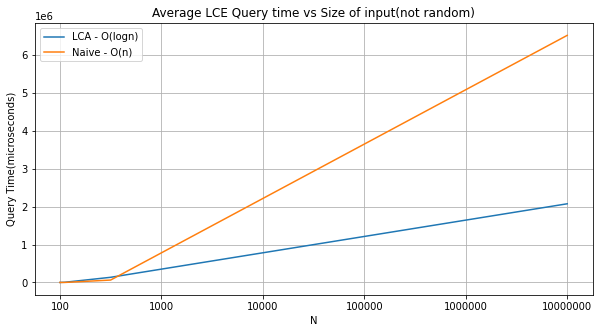

In [180]:
plt.figure('query_time', figsize=(10,5))

ax = plt.gca()
pattern_size = ['10', '100', '1000', '10000', '100000', '1000000', '10000000']
ax.set_xticklabels(pattern_size)

plt.plot(cum_dl.index, cum_dl.exec_time, label='LCA - O(logn)')
plt.plot(cum_nd.index, cum_nd.exec_time, label='Naive - O(n)')

plt.xlabel('N')
plt.ylabel('Query Time(microseconds)')
plt.title("Average LCE Query time vs Size of input(not random)")
plt.grid(True)
plt.legend(loc="upper left")
plt.show()

TODO - Add permuted test